# 2.29. Weibull: Median, quartile difference

In [5]:
alpha <- 2
beta <- 1
m <- 1e5

medX = beta*.6931^(1/alpha)
qdX = beta*(1.3863^(1/alpha) - .2877^(1/alpha))

X = beta*rexp(m)^(1/alpha) # Weibull function of exp dist

X = sort(X)
simulatedMedian = X[.5 * m]
simulatedQd = X[.75*m] - X[.25*m]

c('medX analytical', medX, 'medX simulated', simulatedMedian, 'qdX analytic', qdX, 'qdX simulated', simulatedQd)

[1] "medX analytical"   "0.832526275861609" "medX simulated"   
[4] "0.834205750802178" "qdX analytic"      "0.641035683848787"
[7] "qdX simulated"     "0.645107908022324"

Good correspondence simulated and analytical.

# 2.32. Loss property insurance. Logistic.

In [6]:
alpha <- 2
beta <- 1
m <- 1e5

medianAnalytic = .916
quartileDifferenceAnalytic = 1.299

U = runif(m)
X = beta*log((1 + U/alpha)/(1 - U))

X = sort(X)
medianMC = X[.5 *m]
quartileDifferenceMC = X[.75*m] - X[.25*m]

c('Median MC/analytic', medianMC/medianAnalytic, 'Qdiff MC/analytic', quartileDifferenceMC/quartileDifferenceAnalytic)

[1] "Median MC/analytic" "1.00235629532677"   "Qdiff MC/analytic" 
[4] "1.00023727599539"

MC fits very well.
# 7.9. -log-likelihood of Pareto
Checking how well the ll estimator estimates the parameters for a Pareto distribution when the random variable are drawn randomly from a Pareto distribution with known parameters. How well does the estimated parameters fit the known parameters?

In [22]:
# First: how to construct a basic function in R:
tstFunction = function(a,b){
    c = a+b
    d = 2*c
    #return c
}

# Testing the function
a = 1
b = 2
result = tstFunction(a,b)
c(result)
# It is the last calculation that is returned (d in this case)

[1] 6

In [41]:
# See p 239 for expression
llminus = function(beta, z){
    alphaHat = 1/mean(log(1 + z/beta))
    -log(alphaHat/beta) + (1 + a/alphaHat)
}

alpha = 4
beta = 1
mb = 10
ns = c(1e2, 1e3, 1e4)

estimateParetoParameters = function(mb, n){
    cat('\n n: ', n, '\n')
    #print(c('\n ', n))
    for (i in 1:mb){
        z = beta*(runif(n)**(-1/alpha) - 1) # Pareto distribution
        o = optimize(llminus, c(.001, 1000), z = z) # Localizing maximum of LL function
        betaHat = o[[1]]
        alphaHat = 1/mean(log(1 + z/betaHat))
        print(c(alphaHat, betaHat))
    }
}

for (n in ns){
    estimateParetoParameters(mb, n)
}


 n:  100 
[1] 7.774347 1.869171
[1] 13.467832  4.800365
[1] 7.276391 2.368249
[1] 3.1080095 0.7614932
[1] 6.177131 1.703828
[1] 5.599404 1.481840
[1] 11.444051  4.008011
[1] 4.935728 1.142442
[1] 206.02611  54.20087
[1] 4.863241 1.115101

 n:  1000 
[1] 4.243933 1.100970
[1] 3.4196671 0.7963099
[1] 3.5174031 0.8308205
[1] 4.572542 1.205080
[1] 3.405974 0.812920
[1] 4.724548 1.407597
[1] 5.132685 1.289023
[1] 4.591813 1.145002
[1] 4.915698 1.298369
[1] 3.7046427 0.8707295

 n:  10000 
[1] 3.992348 1.026463
[1] 4.200977 1.058326
[1] 4.088582 1.023819
[1] 3.8759690 0.9643478
[1] 4.046530 1.003666
[1] 4.271360 1.076791
[1] 4.160292 1.038469
[1] 4.015874 1.002783
[1] 3.8357574 0.9615519
[1] 3.899154 0.974758


Accuracy becomes good for large $n$.

# 7.11. Weibull and ML. 

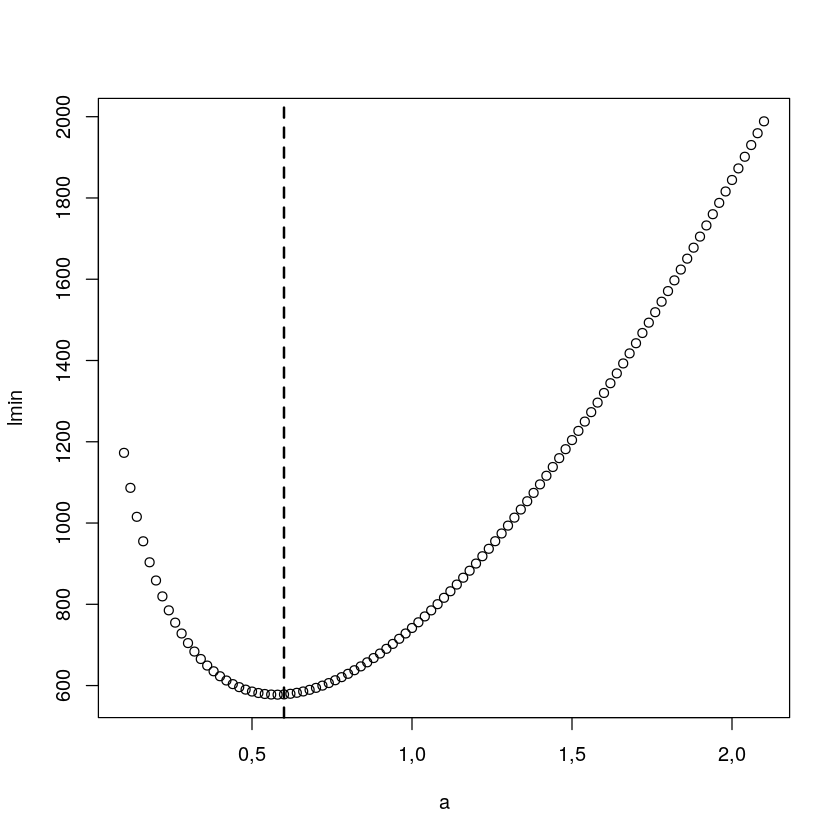

In [5]:
alpha = .6
beta = 1
n = 500

llminus = function(alpha, z){
    betaHat = mean(z**alpha)**(1/alpha)
    -sum(dweibull(z, alpha, betaHat, log=T)) # I think this is the log LL with optimal beta
}

z = rweibull(n, alpha, beta)
a1 = .1
a2 = 2.1
a = a1 + 0:100*(a2-a1)*.01
lmin = a
for (i in 1:101){
    lmin[i] = llminus(a[i], z)
}
plot(a, lmin)
abline(v = alpha, lty=2, lwd=2)

We see that the minimum $\alpha$ is close to the true minimum.

In [58]:
# alpha and beta by identification of minimum in above figure

o = optimize(llminus, c(.001, 50), z = z)
aHat = o[[1]]
betaHat = mean(z**aHat)**(1/aHat)
c('aHat/alpha', aHat/alpha, 'bHat/beta', betaHat/beta)


[1] "aHat/alpha"        "0,957893694479897" "bHat/beta"        
[4] "1,07492155469405"

Good fit.<br>
__Relation to previous exercise:__ <br>
Here we only draw one sample, while in ex 7.9 we drew 10. However, ex 7.9 showed that when n in the MC sims are high, the results converge over the samples, so only one sample is necessary. <br>

__Summary:__<br>
1) Generate random variables (from Weibull here). <br>
2) Plot log likelihood of generated random variables. <br>
3) Observe where optimal alpha in the plottet LL is. <br>
4) Solve for optimal alpha by optimization. <br>
5) Compare solved optimal alpha to optimal alpha from plot. Correspondence indicates that the optimizer works. <br>
6) Compare solved optimal alpha to alpha put in to the random variable generations (the real alpha). This shows whether the LL estimate fits well. <br>

__Note:__ The LL function assumes the distribution. <mark> I think this i wrong. It is just used as input, it varies, so that we can make a plot. So, we do not give a specicific "true" alpha in to the LL function.

# 7.12: Weibull on real data

### Calculate LL on observations assuming Weibull with parameters as in previous exercise.

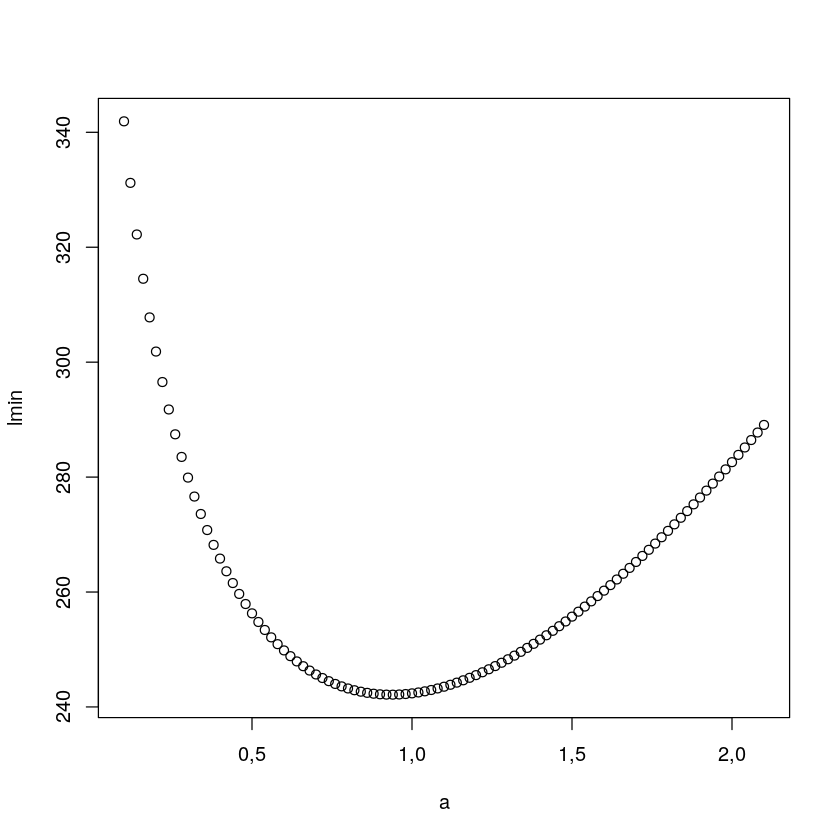

In [22]:
path = 'https://www.uio.no/studier/emner/matnat/math/STK3505/h17/datasett/belgianfire.txt'
z = scan(path)

llminus = function(alpha, z){
    betaHat = mean(z**alpha)**(1/alpha)
    -sum(dweibull(z, alpha, betaHat, log=T)) # I think this is the log LL with optimal beta
}


a1 = .1
a2 = 2.1
a = a1 + 0:100*(a2-a1)*.01
lmin = a
for (i in 1:101){
    lmin[i] = llminus(a[i], z)
}
plot(a, lmin)
# THe follwing was wrong, we have no true alpha here.
#alpha = 0.6 # Assumed, just used value from previous exercise
#beta = 1
#abline(v = alpha, lty=2, lwd=2)

<mark> The following is a misundertanding commented upon above and below. Above is is commented after "note". <mark> 

The fit is bad. The minimum is not reached for the "true" optimal alpha, alpha = 0.6. This is maybe not surprising, given the results in exercise 7.9, where we showed that the accuracy is sensitive to the number of data points. Here the number of data points is low.<br>

<mark> But we don't know the true alpha, so one must maybe work iteratively, feeding in different alphas and stopping when the opimal alpha in the plot equals the "true alpha" fed in? <mark> <br>

<mark> Another possibility can be to ignore the discrepancy between true alpha and opitmal alpha in the plot and only look at the LL value for the different optimal alphas, and choosing the true alpha that gives the lowest LL at optimal alpha? <mark> 
    
### Find optimal alpha

In [20]:
o = optimize(llminus, c(0.0001, 50), z = z)
alphaHat = o[[1]]
betaHat = mean(z**alphaHat)**(1/alphaHat)
c('alphaHat', alphaHat, 'betaHat', betaHat)
c('alphaHatDev', alphaHat/alpha, 'betaHatDev', betaHat/beta)

[1] "alphaHat"          "0,934458257011918" "betaHat"          
[4] "20,2576688543336"

[1] "alphaHatDev"      "1,5574304283532"  "betaHatDev"       "20,2576688543336"

Large deviations from assumed true parameters. <br>

__Note:__ Changing alpha to 0.9, does not change alphaHat. Now there is a good correspondence between alpha and alpha optimum. <mark> Same comment as above: alpha does not matter, there is no true alpha that is fed into the ll function.
    
### Weibull, observed, QQ
Idea: draw random Rainbull based on estimates above, which are based on the true values, and check the results against the true values.

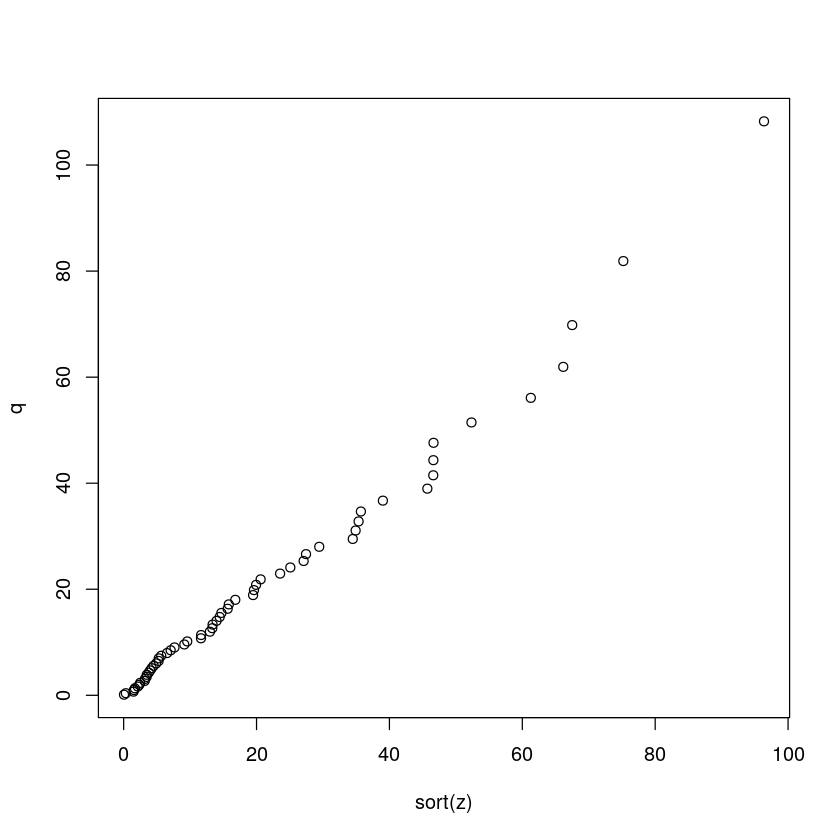

In [26]:
u = (1:60-0.5)/60 # Uniform distribution [0,1]
q = qweibull(u, alphaHat, betaHat)
plot(sort(z), q)

Pretty linear $\rightarrow$ Weibull not a too bad guess.

# 7.15 density t, LL

In [101]:
# LL Minus function, straight from the book
llminus = function(theta, x){
    length(x)*theta[2] - sum(dt((x - theta[1])/exp(theta[2]), df = 2*theta[3], log = T))
}

# theta must be parameters vector (theta here instead of alpha and beta above.)

# Create running function
simulate = function(xMat){
    thetaMat <- matrix(0,3,ncol(xMat)+1)
    for (i in 1:ncol(xMat)){
        x = xMat[,i]
        theta = c(mean(x), log(sd(x)), 10) # NOTE: Does not work with "1"
        o = optim(theta, llminus, x=x) # NOTE: "optimize" did not work
        xsiHat = o$par[1]
        xsiSigmaHat = exp(o$par[2])
        alphaHat = o$par[3]
        thetaMat[, i] = o$par       
    }
}

path = 'https://www.uio.no/studier/emner/matnat/math/STK3505/h17/datasett/newyork.daily.txt'
xMat = matrix(scan(path), byrow=T, ncol=4)

simulate(xMat)
thetaMat

thetaMat[2,]*sqrt(thetaMat[3,]/(thetaMat[3,] - 1))
apply(xMat,2,sd)

Warning message in dt((x - theta[1])/exp(theta[2]), df = 2 * theta[3], log = T):
“NaNs produced”Warning message in dt((x - theta[1])/exp(theta[2]), df = 2 * theta[3], log = T):
“NaNs produced”

"0,0006171244","0,0004099682","0,0003673948","0,0004793926"
"0,0061944920","0,0082044985","0,0058237557","0,0070883426"
"1,7678481560","1,9980025479","1,7540874382","1,6471738663"


[1] 0,009399192 0,011608717 0,008882146 0,011308472

[1] 0,009690380 0,011930286 0,009101287 0,012389485

__Why volatility equals expression:__ <br>
Page 37, the expression equals the sd(x). <br>

<mark> Is there anything more?